<a href="https://colab.research.google.com/github/hongwon2/BigQuery-Practice/blob/main/Z_%EC%B0%A8%ED%8A%B8_SQL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
%load_ext google.colab.data_table

In [7]:
%%bigquery --project ringed-marker-347607 df
WITH
daily_purchase AS (
  SELECT
      date,
      COUNT(order_id) AS orders,
      SUBSTR(CAST(date AS STRING),1,4) AS year,
      SUBSTR(CAST(date AS STRING),6,2) AS month,
      SUBSTR(CAST(date AS STRING),9,2) AS day,
      SUM(sale) AS date_sale
  FROM ch4.sale_data
  GROUP BY date
),
monthly_purchase AS (
  SELECT 
      year,
      month,
      SUM(date_sale) AS monthly_sale,
  FROM daily_purchase
  GROUP BY year,month
),
cal_index AS (
  SELECT
      year,
      month,
      monthly_sale,
      SUM(CASE WHEN year = '2018'THEN monthly_sale END) OVER(ORDER BY year,month ROWS UNBOUNDED PRECEDING) AS cal_sale,
      SUM(monthly_sale) OVER(ORDER BY year,month ROWS BETWEEN 11 PRECEDING AND CURRENT ROW) AS year_sale
  FROM monthly_purchase
  ORDER BY year, month
)

SELECT 
    concat(year,"-",month) AS year_month,
    monthly_sale,
    cal_sale,
    year_sale,
FROM cal_index
WHERE year = '2018'
ORDER BY year_month;


In [21]:
df

,year_month,monthly_sale,cal_sale,year_sale
0,2018-01,43432,43432,623651
1,2018-02,20010,63442,620729
2,2018-03,57691,121133,627288
3,2018-04,35043,156176,623807
4,2018-05,43890,200066,611054
5,2018-06,47568,247634,619076
6,2018-07,44828,292462,625584
7,2018-08,62972,355434,658010
8,2018-09,84846,440280,673606
9,2018-10,77458,517738,691477


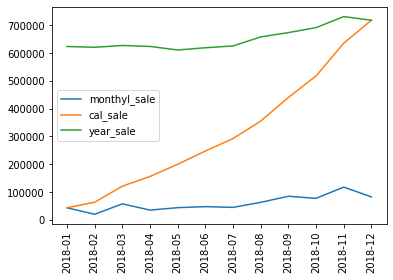

In [27]:
import matplotlib.pyplot as plt
plt.plot(df['year_month'], df['monthly_sale'],label = 'monthyl_sale')
plt.plot(df['year_month'], df['cal_sale'],label = 'cal_sale')
plt.plot(df['year_month'], df['year_sale'],label = 'year_sale')
plt.legend()
plt.xticks(rotation=90)
plt.show()